In [22]:
#! pip install sklearn
! pip install pandas
! pip install numpy
! pip install pyarrow==17.0.0
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 7.8/7.8 MB 60.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 24.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 24.4 MB/s eta 0:00:00


In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [24]:
dota_dataset = pd.read_parquet("./content/dota2_matches.parquet", engine='pyarrow')
dota_dataset.head()

,league,league_id,league_tier,league_start_date_time,league_end_date_time,league_region,series_id,series_type,match_id,match_start_date_time,...,dire_player_5_hero_id,dire_player_5_hero,dire_player_5_position,dire_player_5_lane,dire_player_5_role,dire_player_5_kills,dire_player_5_deaths,dire_player_5_assists,dire_player_5_networth,game_version_id
0,PGL Wallachia Season #2 Open Qualifiers,17006,PROFESSIONAL,2024-08-07,2024-08-12 22:00:00,<NA>,101736994,BEST_OF_ONE,7892879725,2024-08-12 01:13:43,...,72,Gyrocopter,<NA>,<NA>,<NA>,8,4,14,22186,176
1,PGL Wallachia Season #2 Open Qualifiers,17006,PROFESSIONAL,2024-08-07,2024-08-12 22:00:00,<NA>,101736993,BEST_OF_ONE,7892877955,2024-08-12 01:10:46,...,106,Ember Spirit,<NA>,<NA>,<NA>,12,1,11,14481,176
2,PGL Wallachia Season #2 Open Qualifiers,17006,PROFESSIONAL,2024-08-07,2024-08-12 22:00:00,<NA>,101736988,BEST_OF_ONE,7892876435,2024-08-12 01:08:19,...,21,Windranger,POSITION_3,OFF_LANE,CORE,6,2,6,11249,176
3,PGL Wallachia Season #2 Open Qualifiers,17006,PROFESSIONAL,2024-08-07,2024-08-12 22:00:00,<NA>,897543,BEST_OF_THREE,7892876097,2024-08-12 01:07:46,...,94,Medusa,<NA>,<NA>,<NA>,12,0,20,32049,176
4,PGL Wallachia Season #2 Open Qualifiers,17006,PROFESSIONAL,2024-08-07,2024-08-12 22:00:00,<NA>,897542,BEST_OF_THREE,7892875265,2024-08-12 01:06:18,...,21,Windranger,POSITION_1,SAFE_LANE,CORE,5,2,6,12491,176


In [25]:
versions = pd.read_csv("./content/dota2_versions.csv")
versions.head()

,id,name,start_date_time
0,176,7.37,2024-08-01 00:00:00
1,175,7.36c,2024-06-24 00:00:00
2,173,7.36,2024-05-23 00:00:00
3,172,7.35d,2024-03-22 00:00:00
4,171,7.35c,2024-02-24 00:00:00


In [26]:
datasetGt2024 = dota_dataset[dota_dataset.match_start_date_time > '2024-05-23']
datasetGt2024.count()

league                    7041
league_id                 7041
league_tier               7041
league_start_date_time    7041
league_end_date_time      7041
                          ... 
dire_player_5_kills       7041
dire_player_5_deaths      7041
dire_player_5_assists     7041
dire_player_5_networth    7041
game_version_id           7041
Length: 130, dtype: int64

In [27]:
datasetGt2024.groupby('game_version_id').size()

game_version_id
173    3459
175    2431
176    1151
dtype: int64

Significa que temos 3 versões do jogo sendo jogadas
- 7.36
- 7.36c
- 7.37

Os vencedores são quem estão com winner_id, então vamos criar uma nova coluna para saber se é radiant ou dire

In [28]:

def winner_side(row):
  if row['winner_id'] == row['radiant_team_id'] :
    return 'dire'
  else:
    return 'radiant'

datasetGt2024['winner_side'] = datasetGt2024.apply(lambda row: winner_side(row), axis=1)

datasetGt2024.groupby('winner_side').size()


C:\Users\vinic\AppData\Local\Temp\ipykernel_493412\1310757962.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetGt2024['winner_side'] = datasetGt2024.apply(lambda row: winner_side(row), axis=1)


winner_side
dire       3546
radiant    3495
dtype: int64

In [29]:
numerical_columns = datasetGt2024.select_dtypes(include=['number'])
numerical_columns.columns

Index(['league_id', 'series_id', 'match_id', 'match_duration_seconds',
       'first_blood_time_seconds', 'radiant_team_id', 'dire_team_id',
       'winner_id', 'radiant_kills', 'dire_kills', 'radiant_player_1_id',
       'radiant_player_1_hero_id', 'radiant_player_1_kills',
       'radiant_player_1_deaths', 'radiant_player_1_assists',
       'radiant_player_1_networth', 'radiant_player_2_id',
       'radiant_player_2_hero_id', 'radiant_player_2_kills',
       'radiant_player_2_deaths', 'radiant_player_2_assists',
       'radiant_player_2_networth', 'radiant_player_3_id',
       'radiant_player_3_hero_id', 'radiant_player_3_kills',
       'radiant_player_3_deaths', 'radiant_player_3_assists',
       'radiant_player_3_networth', 'radiant_player_4_id',
       'radiant_player_4_hero_id', 'radiant_player_4_kills',
       'radiant_player_4_deaths', 'radiant_player_4_assists',
       'radiant_player_4_networth', 'radiant_player_5_id',
       'radiant_player_5_hero_id', 'radiant_player_5_kill

In [30]:
str_columns = datasetGt2024.select_dtypes(include=['string'])
str_columns.columns

Index(['league', 'league_tier', 'league_region', 'series_type',
       'radiant_team_name', 'dire_team_name', 'radiant_player_1_name',
       'radiant_player_1_hero', 'radiant_player_1_position',
       'radiant_player_1_lane', 'radiant_player_1_role',
       'radiant_player_2_name', 'radiant_player_2_hero',
       'radiant_player_2_position', 'radiant_player_2_lane',
       'radiant_player_2_role', 'radiant_player_3_name',
       'radiant_player_3_hero', 'radiant_player_3_position',
       'radiant_player_3_lane', 'radiant_player_3_role',
       'radiant_player_4_name', 'radiant_player_4_hero',
       'radiant_player_4_position', 'radiant_player_4_lane',
       'radiant_player_4_role', 'radiant_player_5_name',
       'radiant_player_5_hero', 'radiant_player_5_position',
       'radiant_player_5_lane', 'radiant_player_5_role', 'dire_player_1_name',
       'dire_player_1_hero', 'dire_player_1_position', 'dire_player_1_lane',
       'dire_player_1_role', 'dire_player_2_name', 'dire_playe

Separar um dataset para apenas os Radiants, além de fazer 1 dataset para cada player

In [31]:

radiant_columns = datasetGt2024.columns.str.startswith('radiant')
radiant_dataset = datasetGt2024.loc[:, radiant_columns]

radiant_dataset = pd.concat([radiant_dataset, datasetGt2024[['winner_side', 'match_id']]], axis=1)

radiant_players = {}

for i in range(1, 6):
    player_key = f'radiant_player_{i}'
    # Adicionar as colunas relacionadas com radiant
    radiant_players[player_key] = pd.concat([radiant_dataset.loc[:, radiant_dataset.columns.str.contains(f'radiant_player_{i}')],
                                             radiant_dataset[['match_id']]], axis=1)

radiant_dataset.head()

,radiant_team_id,radiant_team_name,radiant_kills,radiant_player_1_id,radiant_player_1_name,radiant_player_1_hero_id,radiant_player_1_hero,radiant_player_1_position,radiant_player_1_lane,radiant_player_1_role,...,radiant_player_5_hero,radiant_player_5_position,radiant_player_5_lane,radiant_player_5_role,radiant_player_5_kills,radiant_player_5_deaths,radiant_player_5_assists,radiant_player_5_networth,winner_side,match_id
0,8132034,Best Warriors,<NA>,874981361,Sh1do,10,Morphling,<NA>,<NA>,<NA>,...,Snapfire,<NA>,<NA>,<NA>,2,8,5,8601,radiant,7892879725
1,9224326,Under Effect,<NA>,996170963,American Capybara,108,Underlord,<NA>,<NA>,<NA>,...,Lina,<NA>,<NA>,<NA>,1,7,1,8764,radiant,7892877955
2,-423387493,T94981,10,916319073,jupiter,136,Marci,POSITION_4,OFF_LANE,LIGHT_SUPPORT,...,Troll Warlord,POSITION_1,SAFE_LANE,CORE,1,7,3,7935,radiant,7892876435
3,9504668,pacific_team,<NA>,1109305351,殪幢緻,59,Huskar,<NA>,<NA>,<NA>,...,Enchantress,<NA>,<NA>,<NA>,3,12,10,9332,radiant,7892876097
4,9450233,The Hut,41,113055105,oldWhite,44,Phantom Assassin,POSITION_1,SAFE_LANE,CORE,...,Crystal Maiden,POSITION_5,SAFE_LANE,HARD_SUPPORT,3,7,23,8254,dire,7892875265


Tentar exibir em gráficos os dados dos jogadores, mas acabou ficando invisualizavel

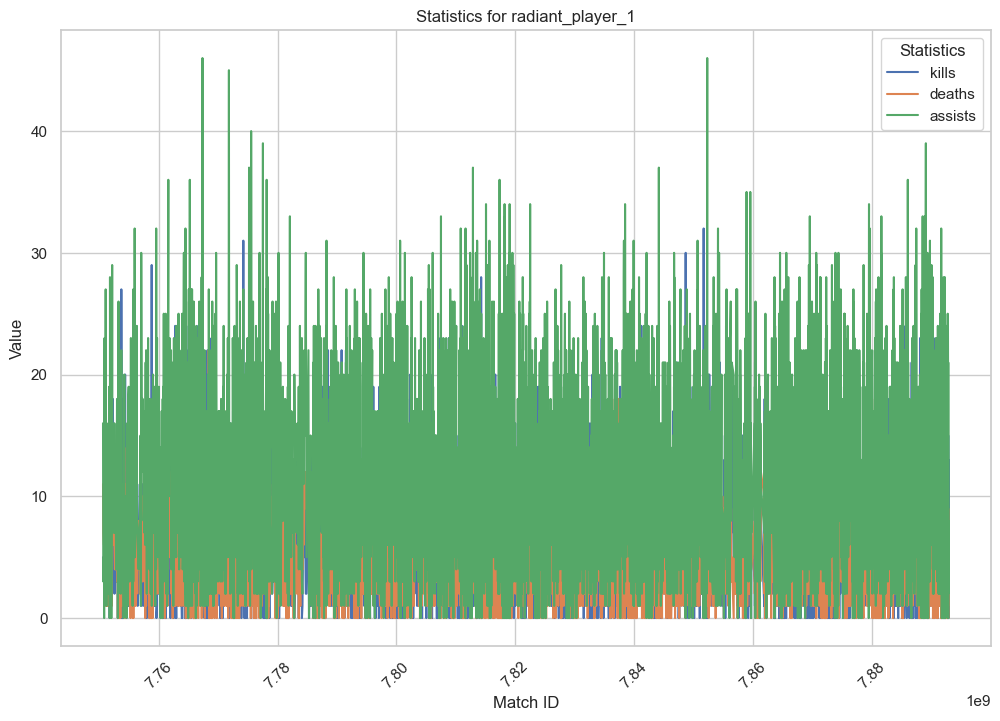

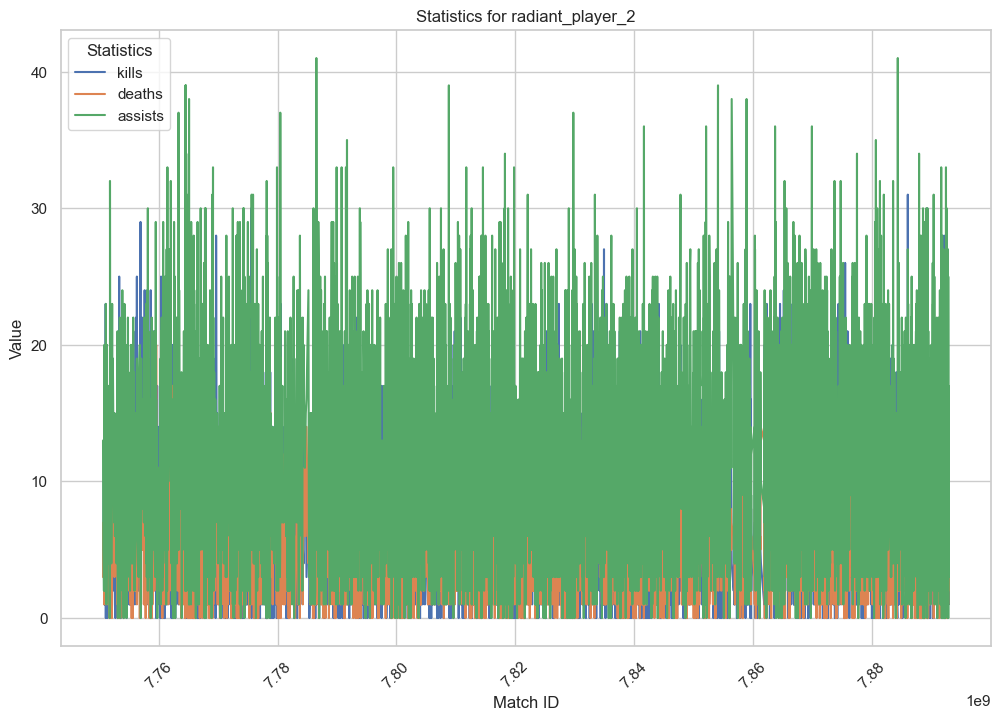

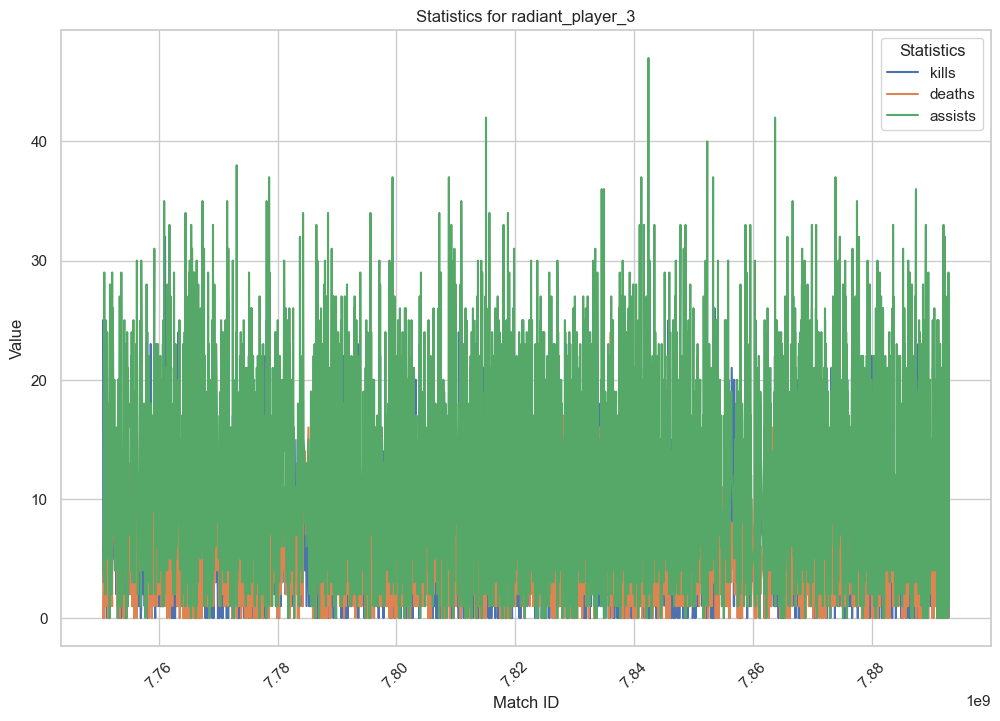

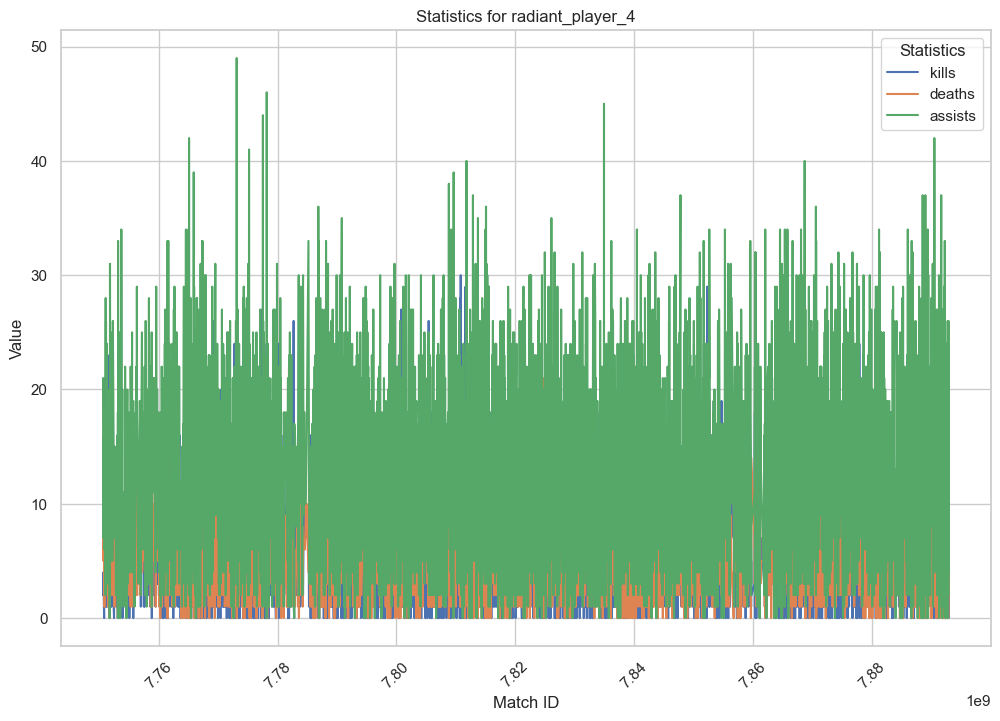

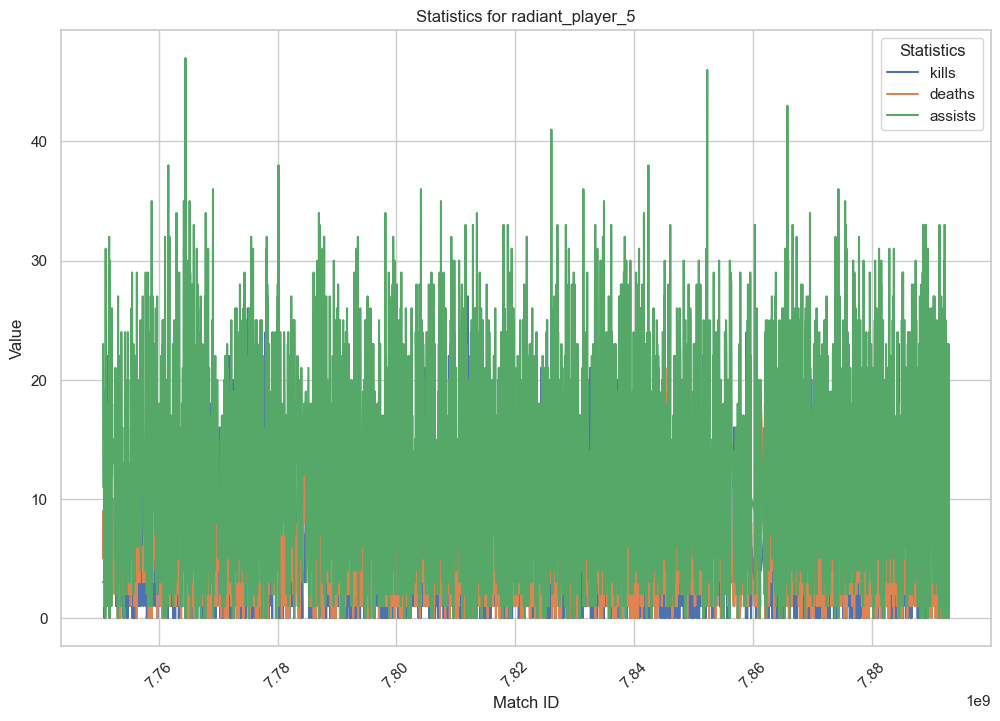

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Sample statistics to plot (adjust these to match your actual columns)
stats_to_plot = ['kills', 'deaths', 'assists']

# Iterate over each player dataset and plot the selected statistics
for player_key, player_df in radiant_players.items():
    # Check if the DataFrame is not empty
    if not player_df.empty:
        plt.figure(figsize=(12, 8))

        # Plot each statistic
        for stat in stats_to_plot:
            # Construct the column name for the specific player and stat
            column_name = f'{player_key}_' + stat

            # Check if the column exists in the DataFrame
            if column_name in player_df.columns:
                sns.lineplot(x=player_df['match_id'], y=player_df[column_name], label=stat)
            else:
                print(f"Column '{column_name}' does not exist in {player_key}")

        plt.title(f'Statistics for {player_key}')
        plt.xlabel('Match ID')
        plt.ylabel('Value')
        plt.legend(title='Statistics')
        plt.xticks(rotation=45)  # Rotate x labels for better readability
        plt.show()
    else:
        print(f"The DataFrame for {player_key} is empty.")


Separar um dataset para apenas os Dires, além de fazer 1 dataset para cada player

In [33]:
dire_columns = datasetGt2024.columns.str.startswith('dire')
dire_dataset = datasetGt2024.loc[:, dire_columns]

dire_dataset = pd.concat([dire_dataset, datasetGt2024[['winner_side', 'match_id']]], axis=1)

dire_players = {}

for i in range(1, 6):
    player_key = f'dire_player_{i}'
    #adicionar as colunas relacionadas com dire
    dire_players[player_key] = pd.concat([dire_dataset.loc[:, dire_dataset.columns.str.contains(f'dire_player_{i}')],
                                             dire_dataset[['match_id']]], axis=1)

dire_dataset.head()

,dire_team_id,dire_team_name,dire_kills,dire_player_1_id,dire_player_1_name,dire_player_1_hero_id,dire_player_1_hero,dire_player_1_position,dire_player_1_lane,dire_player_1_role,...,dire_player_5_hero,dire_player_5_position,dire_player_5_lane,dire_player_5_role,dire_player_5_kills,dire_player_5_deaths,dire_player_5_assists,dire_player_5_networth,winner_side,match_id
0,9470838,Infinity,<NA>,185001854,SexyeYogye,18,Sven,<NA>,<NA>,<NA>,...,Gyrocopter,<NA>,<NA>,<NA>,8,4,14,22186,radiant,7892879725
1,-1558909922,T11417,<NA>,1043218861,iccup aptb gogo slot dam,14,Pudge,<NA>,<NA>,<NA>,...,Ember Spirit,<NA>,<NA>,<NA>,12,1,11,14481,radiant,7892877955
2,9499095,Legacy,36,191290281,Lumière,41,Faceless Void,POSITION_1,SAFE_LANE,CORE,...,Windranger,POSITION_3,OFF_LANE,CORE,6,2,6,11249,radiant,7892876435
3,9324110,Gods of Hell,<NA>,183057960,BenjiMon ^^,106,Ember Spirit,<NA>,<NA>,<NA>,...,Medusa,<NA>,<NA>,<NA>,12,0,20,32049,radiant,7892876097
4,9499637,5 amigos,18,100737431,霸,76,Outworld Destroyer,POSITION_2,MID_LANE,CORE,...,Windranger,POSITION_1,SAFE_LANE,CORE,5,2,6,12491,dire,7892875265


In [35]:
dropCol = datasetGt2024.loc[:, datasetGt2024.columns.str.contains('radiant_')]
dropCol2 = datasetGt2024.loc[:, datasetGt2024.columns.str.contains('dire_')]
datasetGt2024SemPlayers = datasetGt2024.drop(dropCol, axis=1)
datasetGt2024SemPlayers = datasetGt2024SemPlayers.drop(dropCol2, axis=1)
datasetGt2024SemPlayers.head()

,league,league_id,league_tier,league_start_date_time,league_end_date_time,league_region,series_id,series_type,match_id,match_start_date_time,match_duration_seconds,first_blood_time_seconds,winner_id,game_version_id,winner_side
0,PGL Wallachia Season #2 Open Qualifiers,17006,PROFESSIONAL,2024-08-07,2024-08-12 22:00:00,<NA>,101736994,BEST_OF_ONE,7892879725,2024-08-12 01:13:43,1731,54,9470838,176,radiant
1,PGL Wallachia Season #2 Open Qualifiers,17006,PROFESSIONAL,2024-08-07,2024-08-12 22:00:00,<NA>,101736993,BEST_OF_ONE,7892877955,2024-08-12 01:10:46,1669,155,-1558909922,176,radiant
2,PGL Wallachia Season #2 Open Qualifiers,17006,PROFESSIONAL,2024-08-07,2024-08-12 22:00:00,<NA>,101736988,BEST_OF_ONE,7892876435,2024-08-12 01:08:19,1331,200,9499095,176,radiant
3,PGL Wallachia Season #2 Open Qualifiers,17006,PROFESSIONAL,2024-08-07,2024-08-12 22:00:00,<NA>,897543,BEST_OF_THREE,7892876097,2024-08-12 01:07:46,2176,161,9324110,176,radiant
4,PGL Wallachia Season #2 Open Qualifiers,17006,PROFESSIONAL,2024-08-07,2024-08-12 22:00:00,<NA>,897542,BEST_OF_THREE,7892875265,2024-08-12 01:06:18,1514,-34,9450233,176,dire


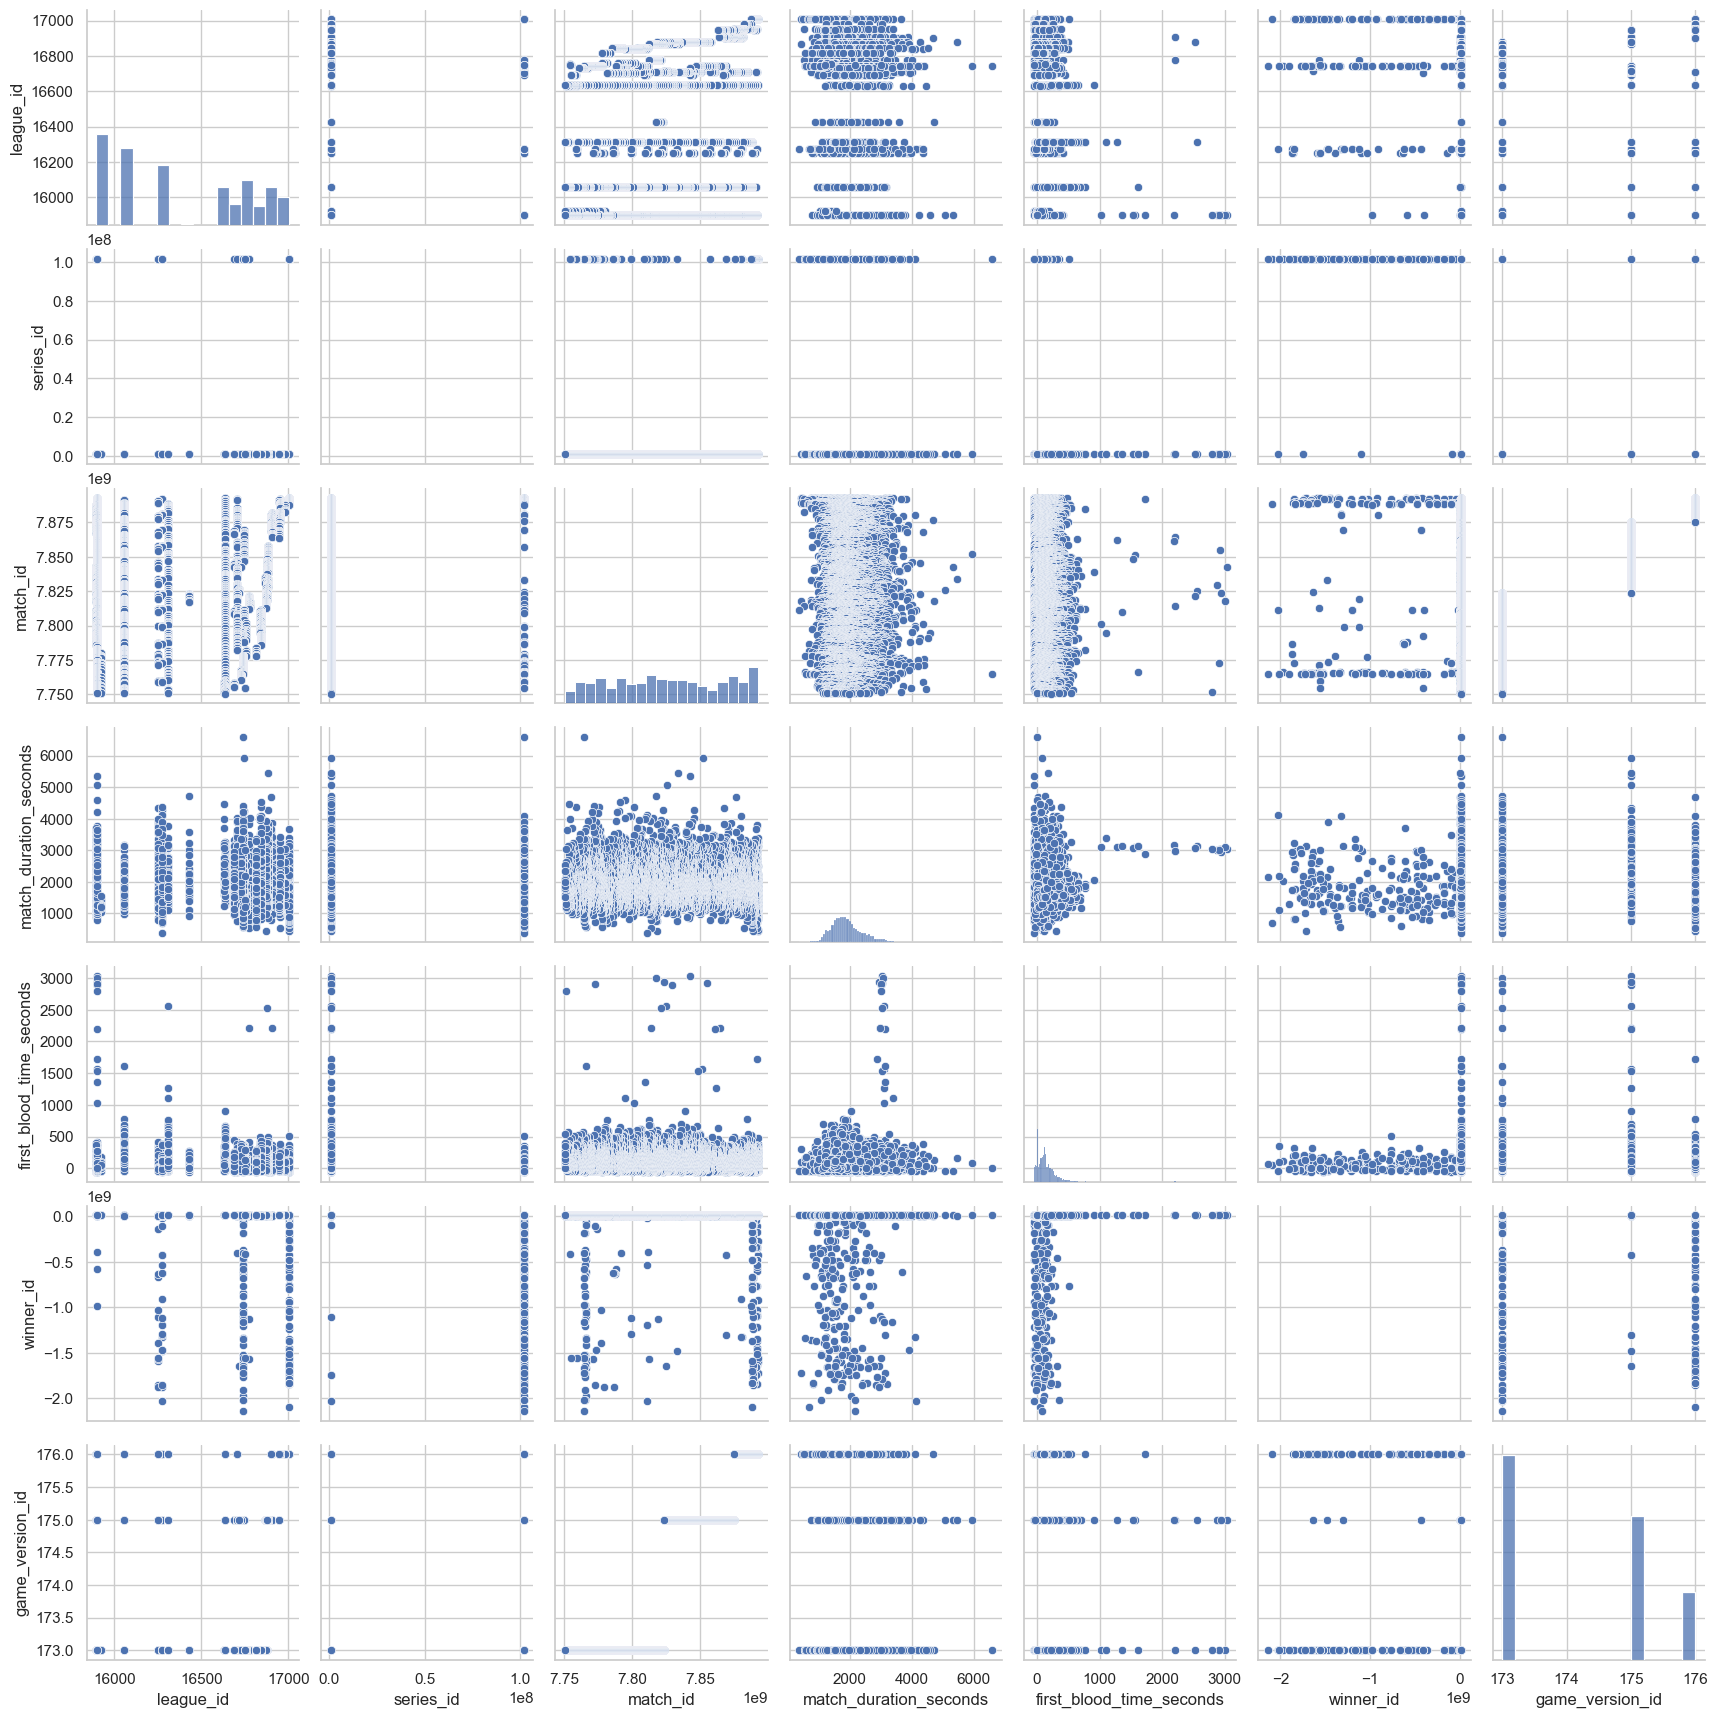

In [36]:
sns.pairplot(datasetGt2024SemPlayers)

In [37]:

# Calculate correlation matrix
# corr_matrix = numerical_columns.corr()

# # Visualize correlation matrix using a heatmap
# sns.heatmap(corr_matrix, annot=True)

# # Check for highly correlated columns
# correlation_matrix = numerical_columns.corr().abs()
# upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
# highly_correlated_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]  # Adjust threshold as needed
# print("Highly correlated columns:", highly_correlated_columns)
